In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Reading and Understanding the Data

In [ ]:
# importing some useful libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
# importing warnings to ignore it
import warnings
warnings.filterwarnings('ignore')
# for display the all columns
pd.set_option('display.max_columns',100)

In [ ]:
# read the train data
train_data = pd.read_csv('/content/gdrive/MyDrive/Capstone Project/fraudTrain.csv')
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train_data.trans_date_trans_time.value_counts().head(60)

2019-04-22 16:02:01    4
2020-06-02 12:47:07    4
2020-06-01 01:37:47    4
2020-03-09 13:43:54    3
2019-12-31 21:33:30    3
2019-12-02 22:07:21    3
2020-04-02 21:44:00    3
2019-03-25 22:40:32    3
2019-12-28 23:02:02    3
2019-12-26 04:49:53    3
2019-05-17 23:47:55    3
2020-03-09 13:58:29    3
2020-06-14 07:16:47    3
2019-12-23 23:16:32    3
2019-12-28 12:13:32    3
2019-02-11 02:15:46    3
2019-01-15 06:58:17    3
2019-12-06 20:30:44    3
2020-03-29 15:19:49    3
2019-12-16 05:42:52    3
2020-06-02 12:05:30    3
2019-12-16 18:28:26    3
2020-05-24 03:44:19    3
2020-06-01 16:25:11    3
2019-12-01 17:42:50    3
2020-06-20 21:27:11    3
2019-06-16 20:38:27    3
2019-07-13 17:27:02    3
2019-06-24 23:15:27    3
2020-05-25 05:22:11    3
2019-09-30 16:35:03    3
2019-12-29 17:39:41    3
2019-12-22 12:32:12    3
2019-12-11 14:20:27    3
2019-02-05 04:16:47    3
2020-05-12 17:21:14    3
2019-12-28 14:01:39    3
2019-06-09 02:58:15    3
2019-07-29 12:57:13    3
2019-12-08 14:29:07    3


In [ ]:
# read the test data
test_data = pd.read_csv('/content/gdrive/MyDrive/Capstone Project/fraudTest.csv')
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# check the shape of the data
print(train_data.shape)
print(test_data.shape)

(1296675, 22)
(555719, 22)


In [ ]:
# check the distribution of numerical columns
train_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
# check the info of the features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

## Data Cleaning

In [ ]:
# check the data
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# check the null values
train_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

##### As we can see there is no null values in the dataset

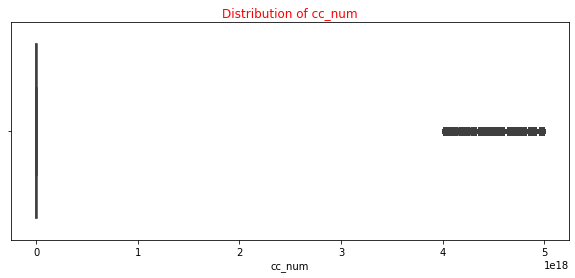

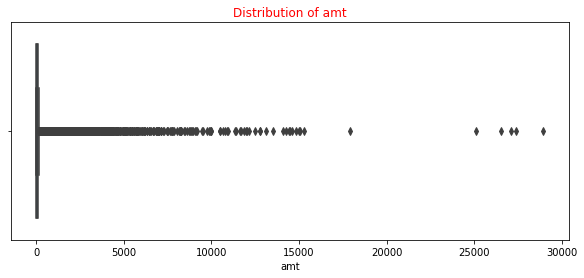

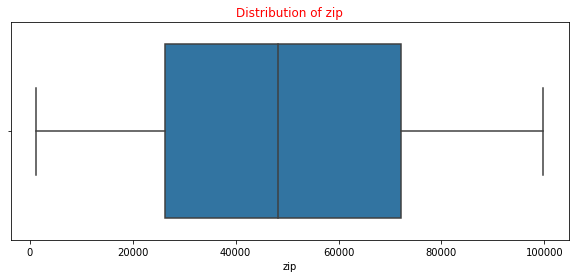

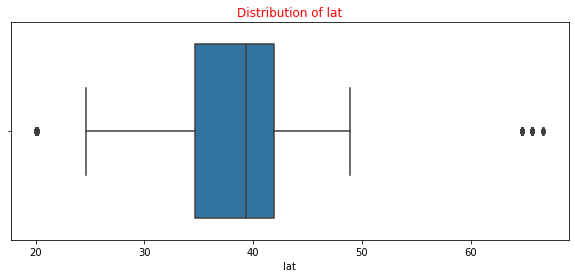

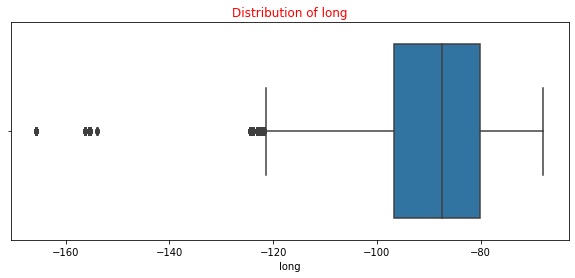

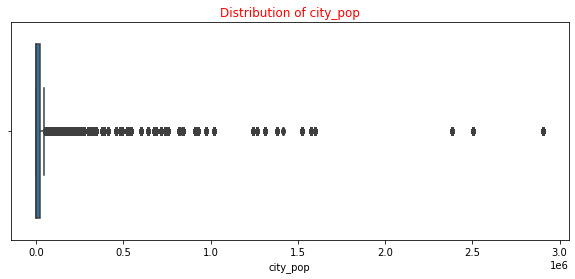

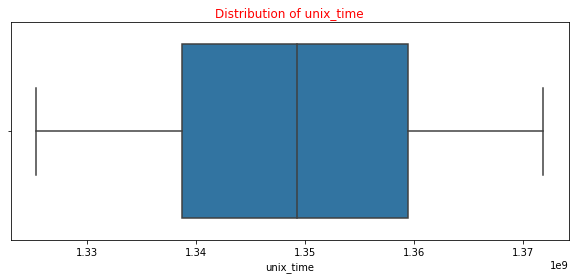

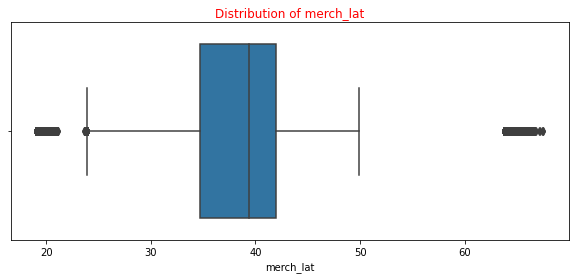

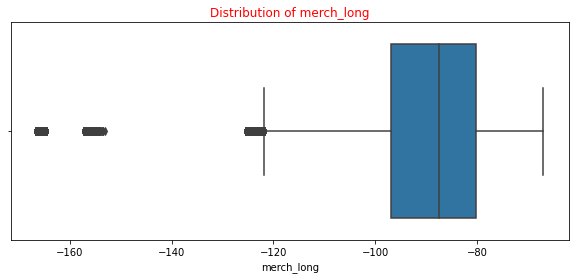

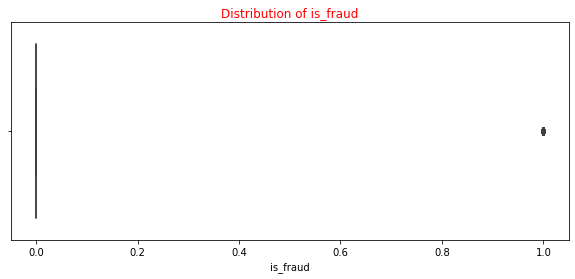

In [ ]:
# check the outlier in the data
for col in train_data.describe().columns:
  plt.figure(figsize=(10,4))
  sns.boxplot(x= col, data= train_data)
  plt.title('Distribution of {}'.format(col), fontsize=12, color='r')
  plt.show()

##### There are some features which has an outlier but we are not removing them for some reason.
- They contain some important information.
- But removing those data points we can loose important information.
- Some features having some meaningful information in thier outlier values such as **lat** and **long** features.
- So we are going to cap them.
- Accept the **amount feature** because when the amount is high the chances of it as fraud are high.

In [ ]:
## capping the features which contain outliers
# set the lower and higher percentile range
lower = 0.05
higher = 0.95

# find the 5% and 95% value of each features
high_city_pop = train_data['city_pop'].quantile([higher])
low_lat, high_lat = train_data['lat'].quantile([lower, higher])
low_long, high_long = train_data['long'].quantile([lower, higher])
low_merch_lat, high_merch_lat = train_data['merch_lat'].quantile([lower, higher])
low_merch_long, high_merch_long = train_data['merch_long'].quantile([lower, higher])

# cap the values which is lower than lower range and higher than higher range with low and high values
train_data['city_pop'] = np.where(train_data['city_pop'] > high_city_pop[0.95], high_city_pop[0.95], train_data['city_pop'])
train_data['lat'] = np.where(train_data['lat'] < low_lat, low_lat, np.where(train_data['lat'] > high_lat, high_lat, train_data['lat']))
train_data['long'] = np.where(train_data['long'] < low_long, low_long, np.where(train_data['long'] > high_long, high_long, train_data['long']))
train_data['merch_lat'] = np.where(train_data['merch_lat'] < low_merch_lat, low_merch_lat, np.where(train_data['merch_lat'] > high_merch_lat, high_merch_lat, train_data['merch_lat']))
train_data['merch_long'] = np.where(train_data['merch_long'] < low_merch_long, low_merch_long, np.where(train_data['merch_long'] > high_merch_long, high_merch_long, train_data['merch_long']))

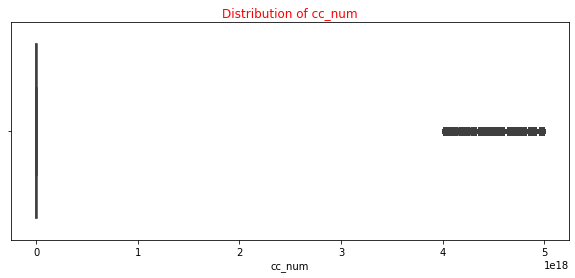

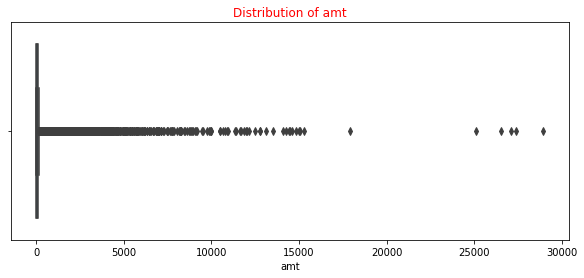

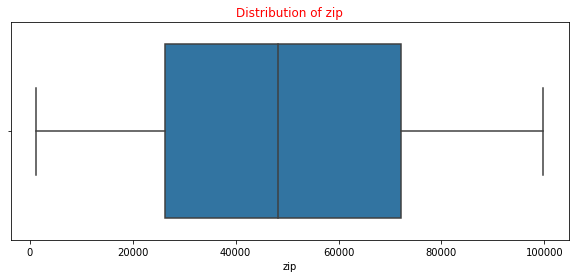

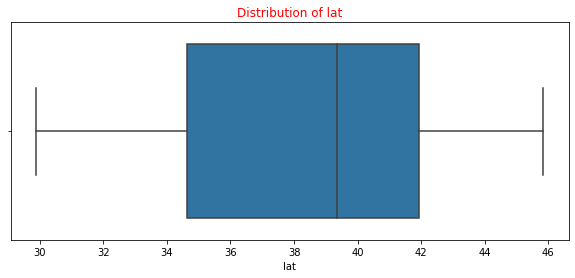

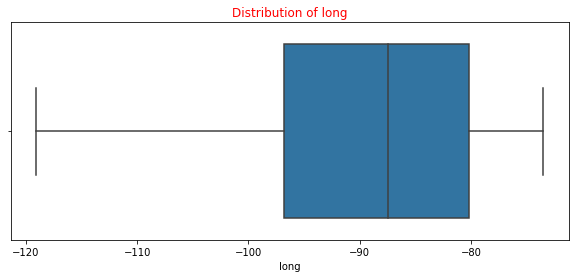

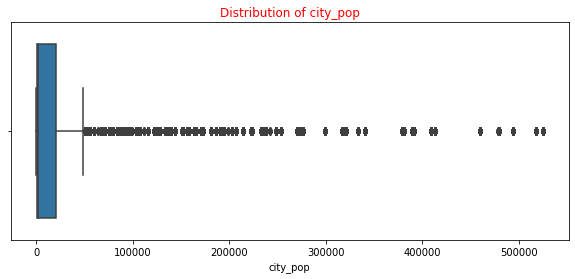

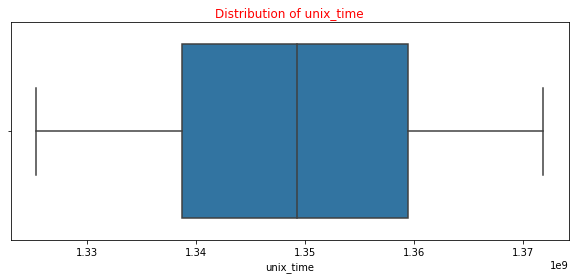

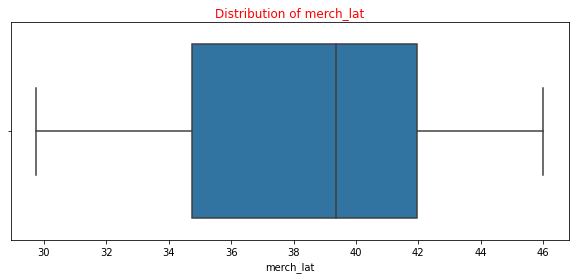

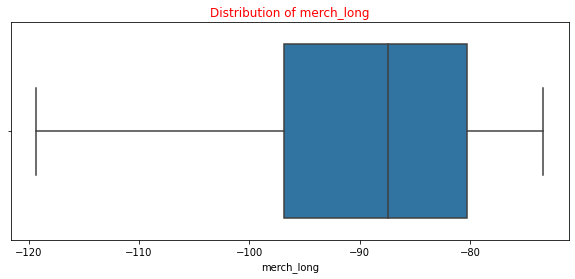

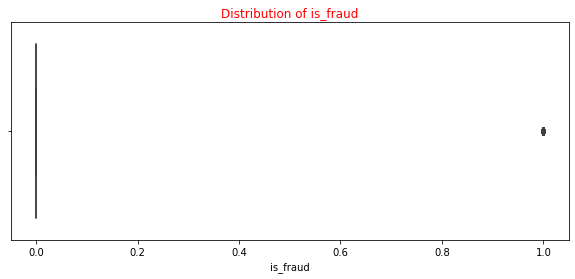

In [ ]:
# check the result after the capping
for col in train_data.describe().columns:
  plt.figure(figsize=(10,4))
  sns.boxplot(x= col, data= train_data)
  plt.title('Distribution of {}'.format(col), fontsize=12, color='r')
  plt.show()

- As **dob** features is useful feature because we are going to extract some of the new features from it.
- Which is going to be useful in our analysis.
- so we have to change the datatype of that feature into pandas dataframe.

In [ ]:
# change the datatype of dob feature
train_data['dob'] = pd.to_datetime(train_data['dob'])

In [ ]:
# change the datatype of dob feature
test_data['dob'] = pd.to_datetime(test_data['dob'])

In [ ]:
# check the result
print(train_data['dob'].dtype)
print(test_data['dob'].dtype)

datetime64[ns]
datetime64[ns]


##### There are some of the features available in the dataset which is not going to be useful for the analysis which we are going to drop.
- And those features are **trans_date_trans_time**, **cc_num** and **trans_num**.

In [ ]:
# drop the unnecessary features
train_data.drop(columns=['trans_date_trans_time','cc_num','trans_num'], axis=1, inplace=True)

In [ ]:
# drop the unnecessary features
test_data.drop(columns=['trans_date_trans_time','cc_num','trans_num'], axis=1, inplace=True)

In [ ]:
# check the result 
train_data.columns

Index(['merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# check the data
train_data.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,45.8433,-118.2105,149.0,Special educational needs teacher,1978-06-21,1325376044,46.003530,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,45.8433,-112.1138,1939.0,Patent attorney,1967-01-12,1325376076,46.003530,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


### Feature Engineering

In [ ]:
# creating an age feature from the dob feature
train_data['age'] = train_data["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

In [ ]:
# creating an age feature from the dob feature
test_data['age'] = test_data["dob"].apply(lambda x : (pd.datetime.now().year - x.year))

In [ ]:
# check the result
train_data.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,33
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,45.8433,-118.2105,149.0,Special educational needs teacher,1978-06-21,1325376044,46.003530,-118.186462,0,43
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,59
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,45.8433,-112.1138,1939.0,Patent attorney,1967-01-12,1325376076,46.003530,-112.561071,0,54
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,35


In [ ]:
# check the result
test_data.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age
0,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0,53
1,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0,31
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0,51
3,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0,34
4,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0,66


In [ ]:
# bin the age features
bins = [0, 18, 60, 100]
labels = ['Teen', 'Adult', 'Senior_Citizen']
train_data['age_group'] = pd.cut(train_data['age'], bins= bins, labels= labels, right=False)

In [ ]:
# check the result
train_data[['age_group', 'age']][train_data['age']<18].head()

,age_group,age
243,Teen,17
247,Teen,16
249,Teen,17
815,Teen,16
981,Teen,17


In [ ]:
# importing useful library for extracting distance feature
from geopy import distance

In [ ]:
# storing number of data points in the data for iteration
len = train_data['lat'].shape[0]
# looping through each data points for finding the distance between latitude and longitude
for i in range(0, len-1):
  train_data['distance'][i] = distance.distance((train_data['lat'][i+1],train_data['long'][i+1]), (train_data['lat'][i],train_data['long'][i])).km

In [ ]:
# storing number of data points in the data for iteration
len = test_data['lat'].shape[0]
# looping through each data points for finding the distance between latitude and longitude
for i in range(0, len-1):
  test_data['distance'][i] = distance.distance((test_data['lat'][i+1],test_data['long'][i+1]), (test_data['lat'][i],test_data['long'][i])).km

In [ ]:
# check the result
train_data.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,age_group,distance
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,33,Adult,3266.515037
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,45.8433,-118.2105,149.0,Special educational needs teacher,1978-06-21,1325376044,46.003530,-118.186462,0,43,Adult,626.699885
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,59,Adult,407.122773
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,45.8433,-112.1138,1939.0,Patent attorney,1967-01-12,1325376076,46.003530,-112.561071,0,54,Adult,2800.385961
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,35,Adult,426.105523


In [ ]:
# check the result
test_data.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,distance
0,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0,53,2700.270256
1,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0,31,3104.963493
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0,51,1498.187952
3,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0,34,1779.945422
4,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0,66,710.220147


In [ ]:
# storing number of data points in the data for iteration
len = train_data['merch_lat'].shape[0]
# looping through each data points for finding the distance between latitude and longitude
for i in range(0, len-1):
  train_data['merch_distance'][i] = distance.distance((train_data['merch_lat'][i+1],train_data['merch_long'][i+1]), (train_data['merch_lat'][i],train_data['merch_long'][i])).km

In [ ]:
# storing number of data points in the data for iteration
len = test_data['merch_lat'].shape[0]
# looping through each data points for finding the distance between latitude and longitude
for i in range(0, len-1):
  test_data['merch_distance'][i] = distance.distance((test_data['merch_lat'][i+1],test_data['merch_long'][i+1]), (test_data['merch_lat'][i],test_data['merch_long'][i])).km

## Univariate Analysis

##### Before performing analysis we are going to split the data between fradulent one and non-fradulent one

In [ ]:
# creating fradulent data
target_1 = train_data.loc[train_data['is_fraud']==1]
target_1.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,age_group,distance,merch_distance
2449,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885.0,Soil scientist,1988-09-15,1325466397,36.430124,-81.179483,1,33,Adult,1447.755003,1571.594425
2472,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.8826,-98.4590,525713.0,Horticultural consultant,1960-10-28,1325468849,29.819364,-99.142791,1,61,Senior_Citizen,1989.527890,1949.472704
2523,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.8826,-98.4590,525713.0,Horticultural consultant,1960-10-28,1325473523,29.751653,-98.836360,1,61,Senior_Citizen,2547.340391,2621.423654
2546,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885.0,Soil scientist,1988-09-15,1325475483,35.909292,-82.091010,1,33,Adult,1006.918500,1026.221330
2553,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.8826,-98.4590,525713.0,Horticultural consultant,1960-10-28,1325476547,29.786426,-98.683410,1,61,Senior_Citizen,1656.174695,1574.328979


In [ ]:
# creating non-fradulent data
target_0 = train_data.loc[train_data['is_fraud']==0]
target_0.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,age_group,distance,merch_distance
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,33,Adult,3266.515037,3203.581686
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,45.8433,-118.2105,149.0,Special educational needs teacher,1978-06-21,1325376044,46.003530,-118.186462,0,43,Adult,626.699885,574.224871
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,59,Adult,407.122773,318.655302
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,45.8433,-112.1138,1939.0,Patent attorney,1967-01-12,1325376076,46.003530,-112.561071,0,54,Adult,2800.385961,2887.582655
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,35,Adult,426.105523,305.798851


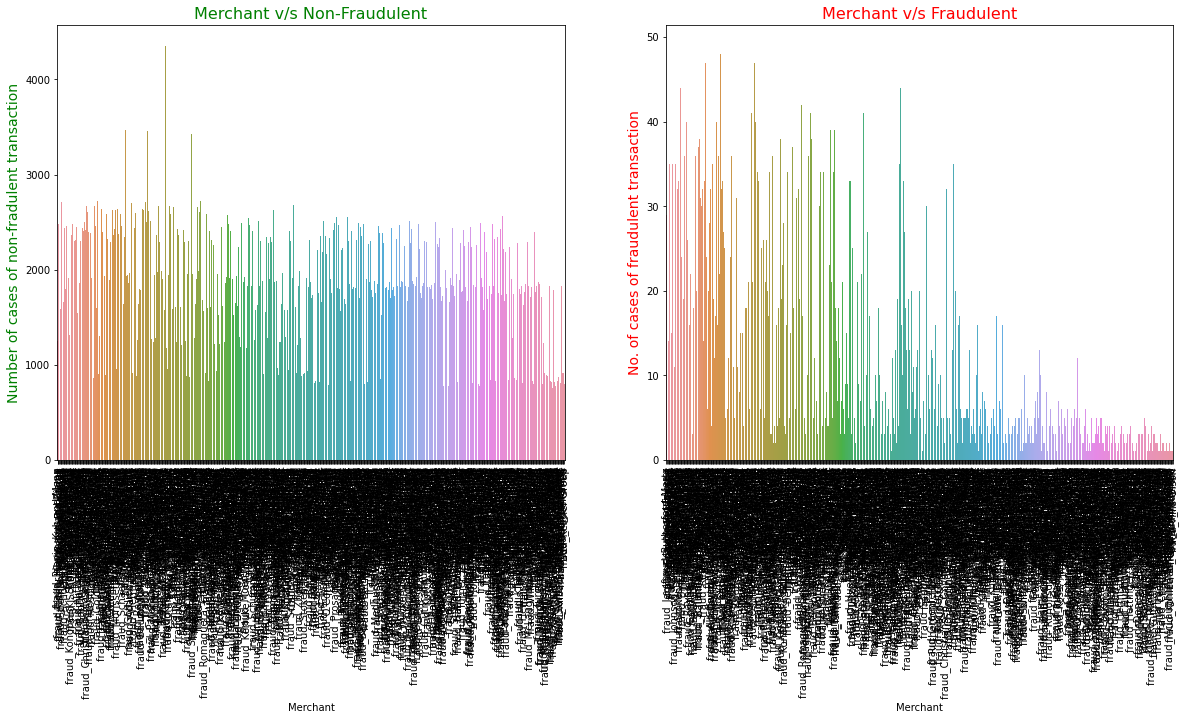

In [ ]:
# check the merchants vs fradulent and non-fradulent transactions
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot('merchant', data=target_0)
plt.title('Merchant v/s Non-Fraudulent', fontsize=16, color='g')
plt.xlabel('Merchant')
plt.xticks(rotation=90)
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
sns.countplot('merchant', data=target_1)
plt.title('Merchant v/s Fraudulent', fontsize=16, color='r')
plt.xlabel('Merchant')
plt.xticks(rotation=90)
plt.ylabel('No. of cases of fraudulent transaction', fontsize=14, color='r')
plt.show()

##### From this analysis we can conclude the following aspects:
- There are some **merchants** which has a **very high counts** in terms of fradulent transactions activities.
- Chances are very high that these **merchants** are **involved** in the fradulent activities.
- As we can see in the fradulent charts.

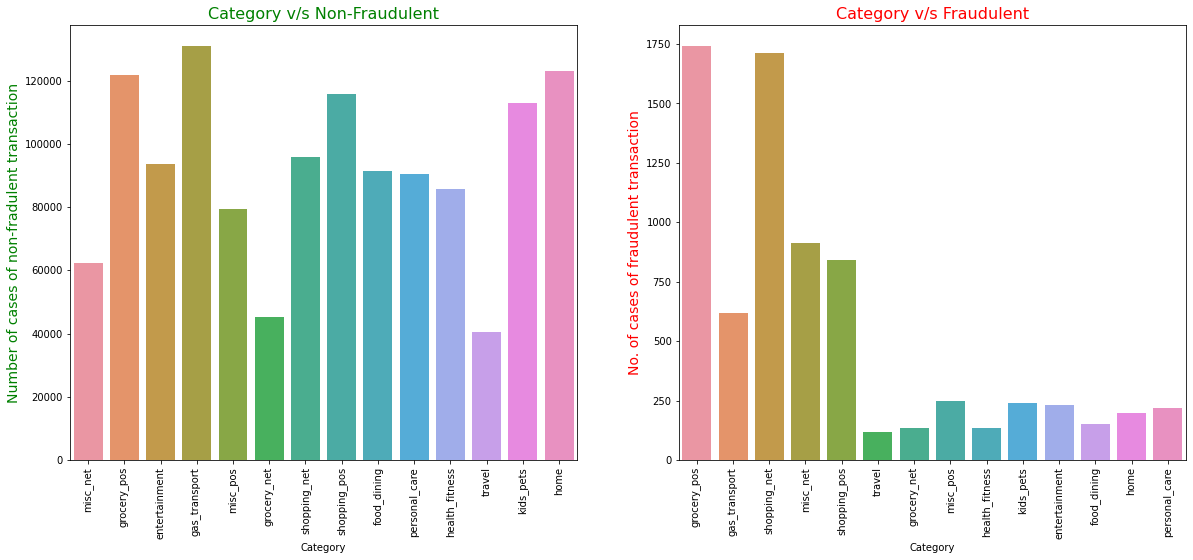

In [ ]:
# check the categories vs fradulent and non-fradulent transactions
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot('category', data=target_0)
plt.title('Category v/s Non-Fraudulent', fontsize=16, color='g')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
sns.countplot('category', data=target_1)
plt.title('Category v/s Fraudulent', fontsize=16, color='r')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('No. of cases of fraudulent transaction', fontsize=14, color='r')
plt.show()

##### From this analysis we can conclude the following aspects:
- Some of the categories such as **grocery**, **gas_transport** and **shoping_malls** where the chances of fradulent transactions are high.

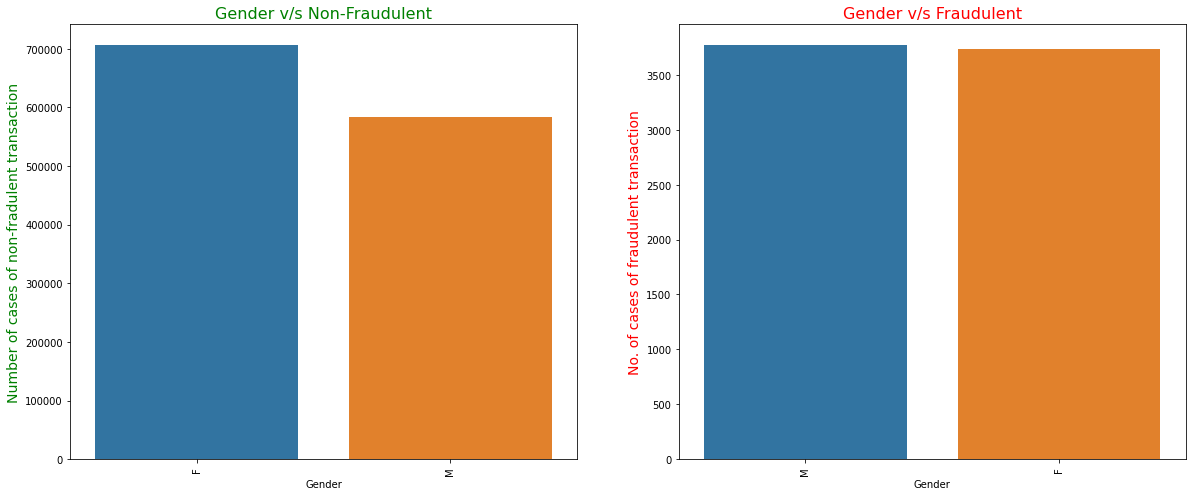

In [ ]:
# check the gender vs fradulent and non-fradulent transactions
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot('gender', data=target_0)
plt.title('Gender v/s Non-Fraudulent', fontsize=16, color='g')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
sns.countplot('gender', data=target_1)
plt.title('Gender v/s Fraudulent', fontsize=16, color='r')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.ylabel('No. of cases of fraudulent transaction', fontsize=14, color='r')
plt.show()

##### From this analysis we can conclude the following aspect:
- It seems **fraudulent transactions** happens with both **male** and **female**.

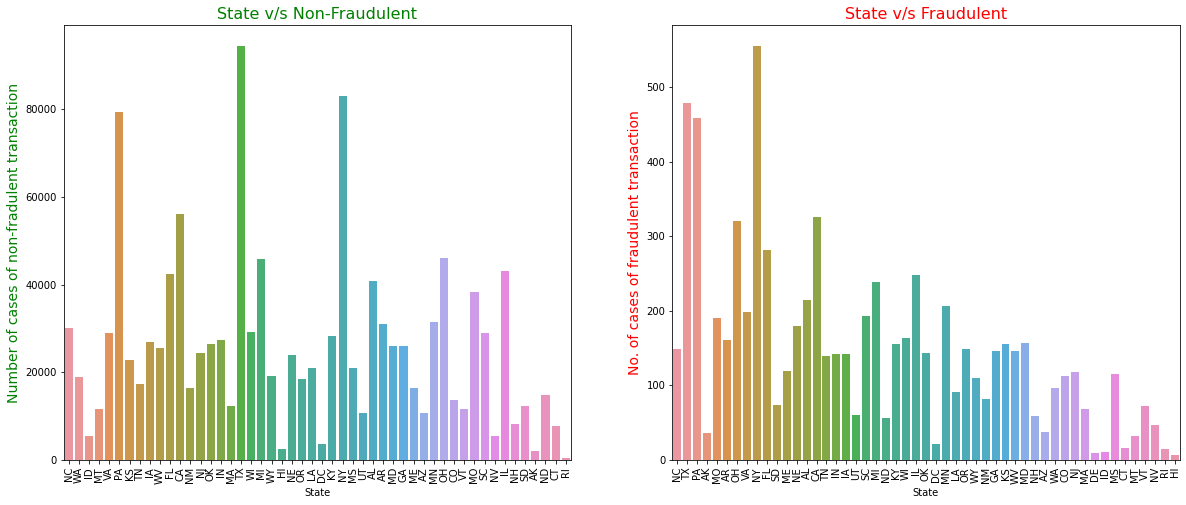

In [ ]:
# check the state vs fradulent and non-fradulent transactions
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot('state', data=target_0)
plt.title('State v/s Non-Fraudulent', fontsize=16, color='g')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
sns.countplot('state', data=target_1)
plt.title('State v/s Fraudulent', fontsize=16, color='r')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('No. of cases of fraudulent transaction', fontsize=14, color='r')
plt.show()

##### From this analysis we can conclude the following aspect:
- There are some states where fraudulent transactions heppens at very high rate.
- Where **NY** is at **first** position followed by **TX** and **PA**.

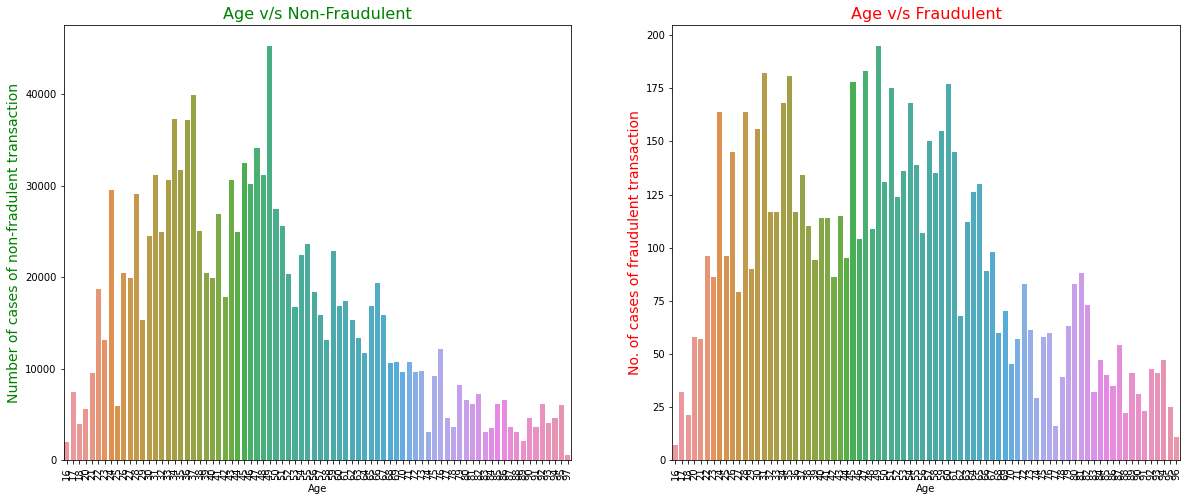

In [ ]:
# check the age vs fradulent and non-fradulent transactions
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot('age', data=target_0)
plt.title('Age v/s Non-Fraudulent', fontsize=16, color='g')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
sns.countplot('age', data=target_1)
plt.title('Age v/s Fraudulent', fontsize=16, color='r')
plt.xlabel('Age')
plt.xticks(rotation=90)
plt.ylabel('No. of cases of fraudulent transaction', fontsize=14, color='r')
plt.show()

##### From this analysis we can conclude the following aspect:
- Large number of fraudulent transactions happens between the 30 and 60 age group of people.

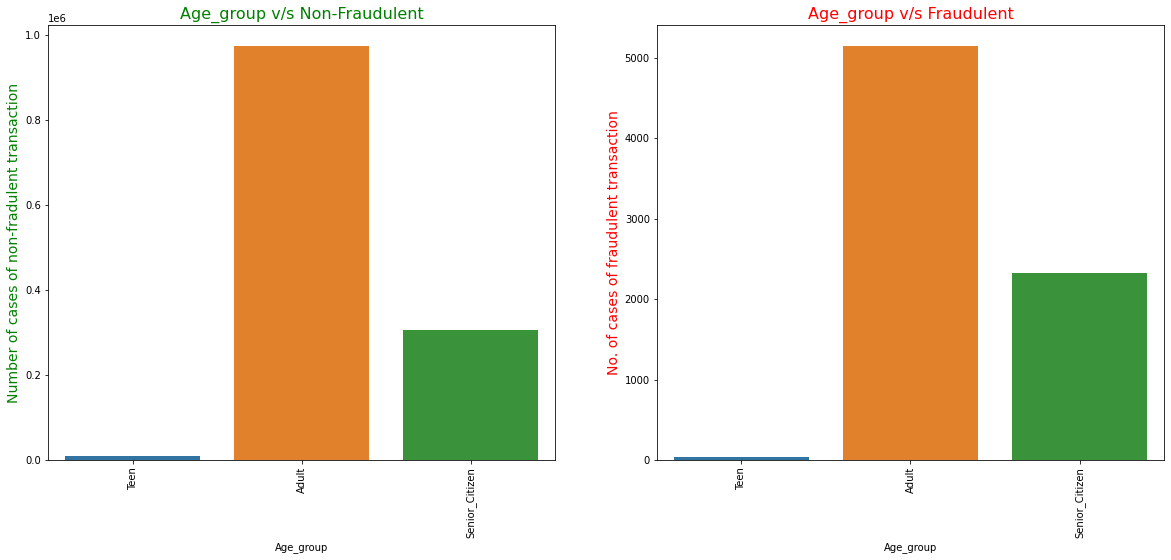

In [ ]:
# check the age_group vs fradulent and non-fradulent transactions
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.countplot('age_group', data=target_0)
plt.title('Age_group v/s Non-Fraudulent', fontsize=16, color='g')
plt.xlabel('Age_group')
plt.xticks(rotation=90)
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
sns.countplot('age_group', data=target_1)
plt.title('Age_group v/s Fraudulent', fontsize=16, color='r')
plt.xlabel('Age_group')
plt.xticks(rotation=90)
plt.ylabel('No. of cases of fraudulent transaction', fontsize=14, color='r')
plt.show()

- From this charts we can also see the same trend as the large number of **fraudulent transaction** happens among the **adults** followed by **senior citizen**.

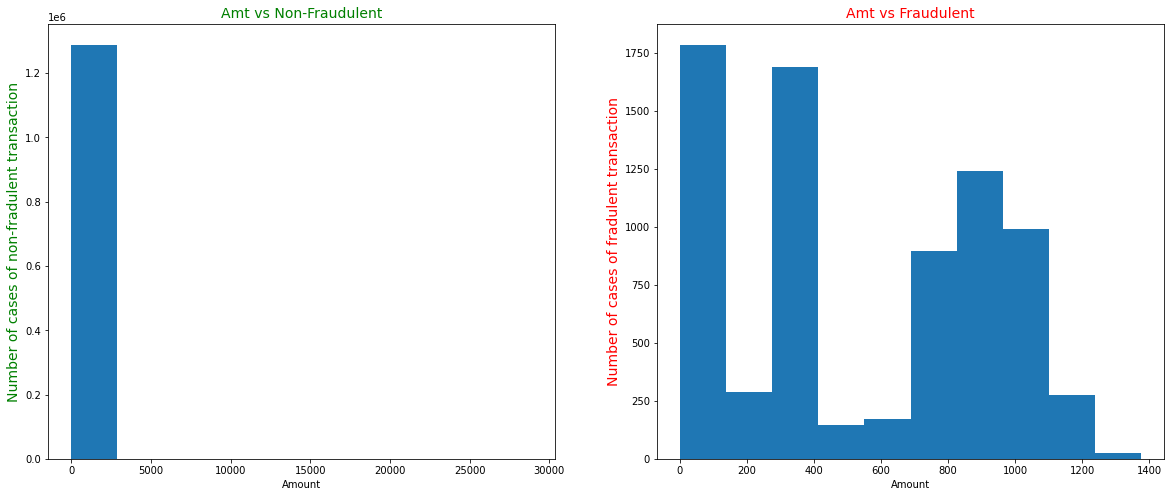

In [ ]:
# check the amount vs fraudulent and non-fraudulent transaction
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
target_0.amt.plot.hist()
plt.title('Amt vs Non-Fraudulent', fontsize=14, color='g')
plt.xlabel('Amount')
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
target_1.amt.plot.hist()
plt.title('Amt vs Fraudulent', fontsize=14, color='r')
plt.xlabel('Amount')
plt.ylabel('Number of cases of fradulent transaction', fontsize=14, color='r')
plt.show()

##### From this analysis we can conclude the following aspects:
- Transaction of amount **0 to 180** and **250 to 400** are more inclined toward **fraudulent**.
- And some of the transaction of amount between **790 and 1200** are also being **fraudulent**.

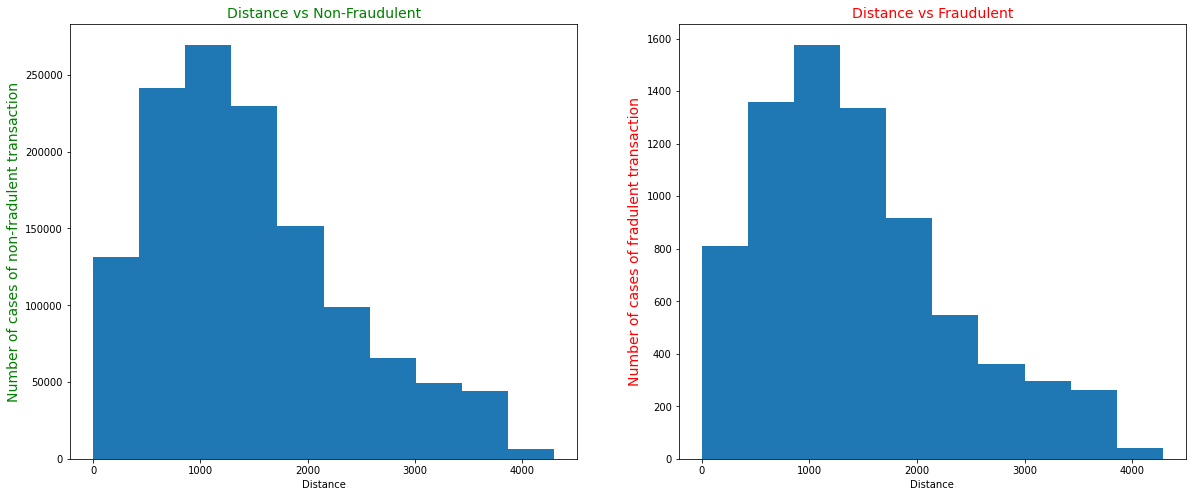

In [ ]:
# check the distance vs fraudulent and non-fraudulent transaction
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
target_0.distance.plot.hist()
plt.title('Distance vs Non-Fraudulent', fontsize=14, color='g')
plt.xlabel('Distance')
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
target_1.distance.plot.hist()
plt.title('Distance vs Fraudulent', fontsize=14, color='r')
plt.xlabel('Distance')
plt.ylabel('Number of cases of fradulent transaction', fontsize=14, color='r')
plt.show()

#### From this analysis we can conclude the following aspects:
- Distance between **800 and 1800** transactions happens, thier chances of **fraudulent** are **high**
.

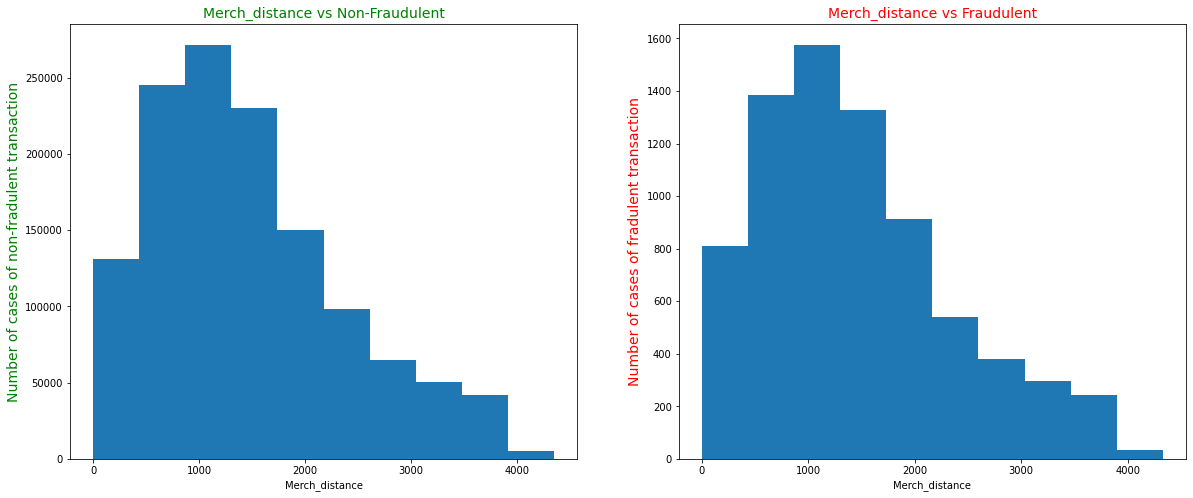

In [ ]:
# merch_distance vs fraudulent and non-fraudulent transaction
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
target_0.merch_distance.plot.hist()
plt.title('Merch_distance vs Non-Fraudulent', fontsize=14, color='g')
plt.xlabel('Merch_distance')
plt.ylabel('Number of cases of non-fradulent transaction', fontsize=14, color='g')
plt.subplot(1, 2, 2)
target_1.merch_distance.plot.hist()
plt.title('Merch_distance vs Fraudulent', fontsize=14, color='r')
plt.xlabel('Merch_distance')
plt.ylabel('Number of cases of fradulent transaction', fontsize=14, color='r')
plt.show()

##### Same pattern occurs with **Merch_distance** feature.

## Bivariate Analysis

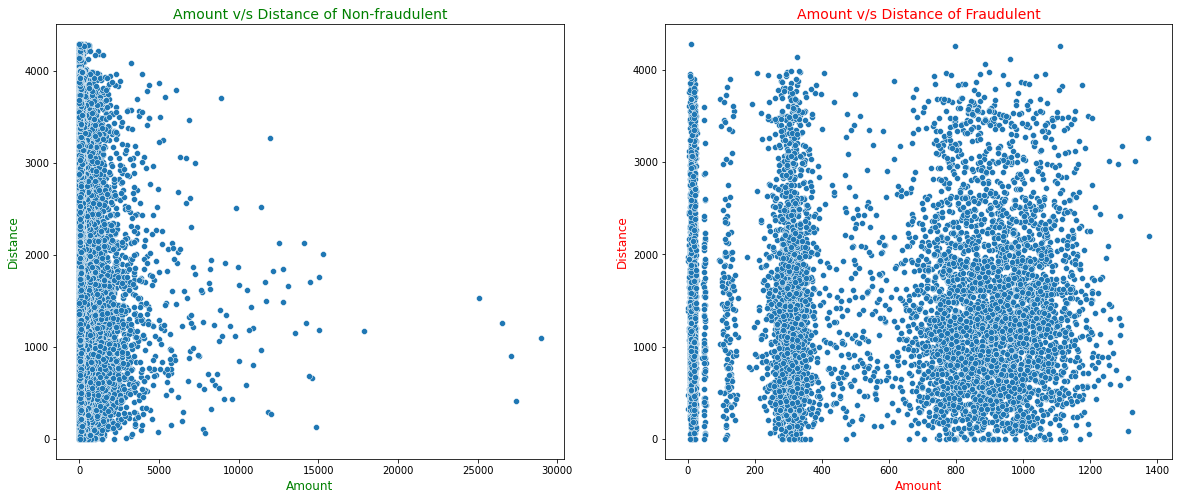

In [ ]:
# Amount vs Distance vs Fraudulent and Non-Fraudulent Transaction
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x='amt', y='distance', data= target_0)
plt.title('Amount v/s Distance of Non-fraudulent', fontsize=14, color='g')
plt.xlabel('Amount', fontsize=12, color='g')
plt.ylabel('Distance', fontsize=12, color='g')
plt.subplot(1,2,2)
sns.scatterplot(x='amt', y='distance', data= target_1)
plt.title('Amount v/s Distance of Fraudulent', fontsize=14, color='r')
plt.xlabel('Amount', fontsize=12, color='r')
plt.ylabel('Distance', fontsize=12, color='r')
plt.show()

##### From this analyis we can conclude the following aspects:
- Where the **amount** is between **800 and 1200** and the **distance** is between **900 and 1800** those transactions are more prone to **fraudulent transactions**.
- Same happen with the **merch_distance**.

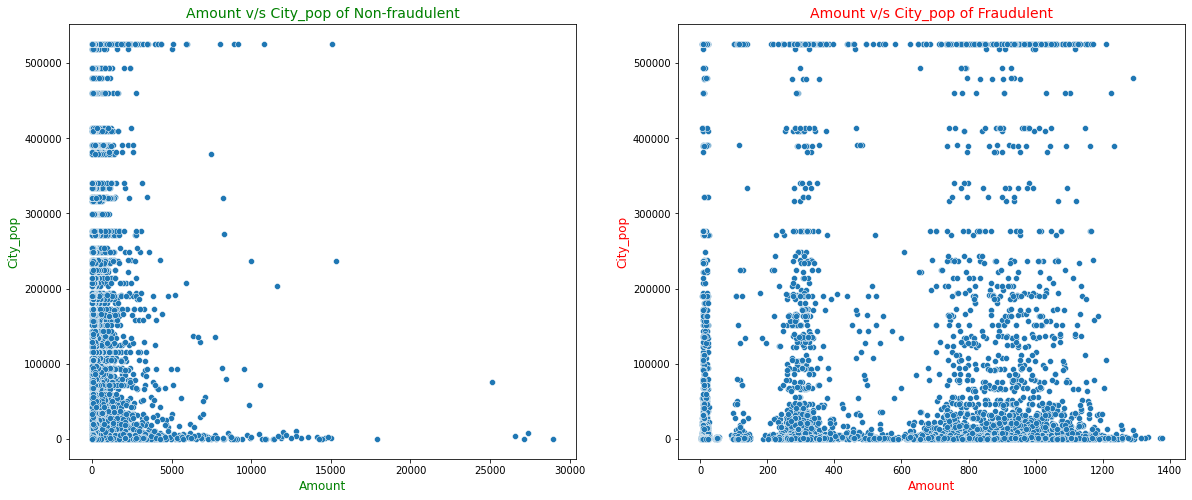

In [ ]:
# Amount vs City_pop vs Fraudulent and Non-Fraudulent Transaction
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.scatterplot(x='amt', y='city_pop', data= target_0)
plt.title('Amount v/s City_pop of Non-fraudulent', fontsize=14, color='g')
plt.xlabel('Amount', fontsize=12, color='g')
plt.ylabel('City_pop', fontsize=12, color='g')
plt.subplot(1,2,2)
sns.scatterplot(x='amt', y='city_pop', data= target_1)
plt.title('Amount v/s City_pop of Fraudulent', fontsize=14, color='r')
plt.xlabel('Amount', fontsize=12, color='r')
plt.ylabel('City_pop', fontsize=12, color='r')
plt.show()

##### From this analysis we can conclude the following aspect:
- **City** where **population** are **very less** and **transaction amount** happen between **700 and 1200** those transaction are more prone to be **fraudulent transaction**.

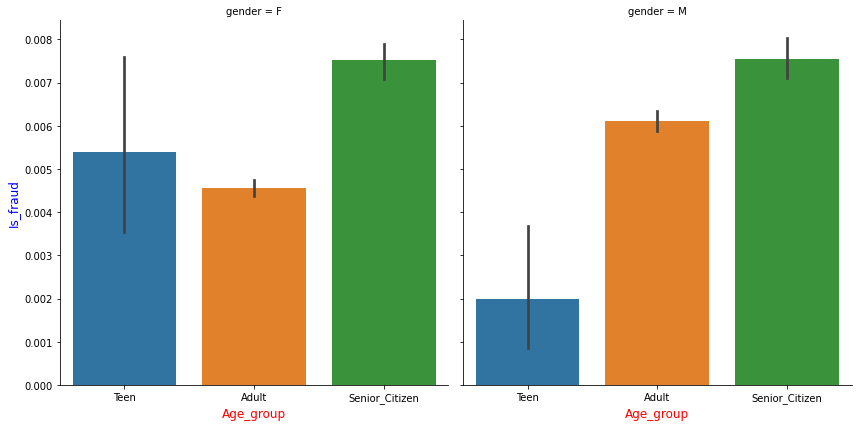

In [ ]:
# age_group vs gender vs frudulent and non-fraudulent
fig = sns.catplot(x="age_group", y="is_fraud", col="gender", kind="bar", height=6, data=train_data)
fig.set_xlabels('Age_group', fontsize=12, color='r')
fig.set_ylabels('Is_fraud', fontsize=12, color='b')
plt.show()

##### From this analysis we can conclude the following aspect:
- **Fraudulent transactions** happen more with **senior citizen** as compared to other group.
- **Female** of every group are more prone for **fraudulent transaction** as compared to male.

###### There are some feature which we have to drop before preparing the data for model building and those features are **first**, **last**, **street**, **dob** and **unix_time** which is not going to be helpful.

In [ ]:
# drop the features
train_data.drop(columns=['first','last','street','dob','unix_time'], axis=1, inplace=True)

In [ ]:
# drop the features
test_data.drop(columns=['first','last','street','dob','unix_time'], axis=1, inplace=True)

In [ ]:
# check the result
train_data.head()

## Data Preparation

In [ ]:
# Split into X and y
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [ ]:
# check the result
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
X_train.head()

In [ ]:
# convert the gender feature value into binary
X_train['gender'] = X_train.gender.map(lambda x: 1 if x =='M' else 0)

In [ ]:
# convert the gender feature value into binary
X_test['gender'] = X_test.gender.map(lambda x: 1 if x =='M' else 0)

In [ ]:
# check the result
X_train.gender.value_counts()

In [ ]:
# check the result
X_test.gender.value_counts()

##### There are some categorical features contain more than 50 values.
- So we are going to use some other techniques instead of creating dummy variable.
- And those features are **merchant**, **city**, **state**, **job** and **age** features.
- And we are also drop the **age_group** feature because that is created only for the visualization purpose.

In [ ]:
# drop the age_group feature
X_train.drop('age_group', axis=1, inplace=True)

In [ ]:
X_train.shape

In [ ]:
map_mean_merch = train_data.groupby('merchant')['is_fraud'].mean()
map_mean_merch

In [ ]:
X_train['merchant_mean'] = X_train.merchant.map(map_mean_merch)

In [ ]:
X_train.groupby('merchant')['merchant_mean'].agg(['max','min'])

In [ ]:
map_mean_merch = test_data.groupby('merchant')['is_fraud'].mean()
map_mean_merch

In [ ]:
X_test['merchant_mean'] = X_test.merchant.map(map_mean_merch)

In [ ]:
X_test.groupby('merchant')['merchant_mean'].agg(['max','min'])

In [ ]:
map_mean_city = train_data.groupby('city')['is_fraud'].mean()
map_mean_city

In [ ]:
X_train['city_mean'] = X_train.city.map(map_mean_city)

In [ ]:
X_train.groupby('city')['city_mean'].agg(['max','min'])

In [ ]:
map_mean_city = test_data.groupby('city')['is_fraud'].mean()
map_mean_city

In [ ]:
X_test['city_mean'] = X_test.city.map(map_mean_city)

In [ ]:
X_test.groupby('city')['city_mean'].agg(['max','min'])

In [ ]:
map_mean_state = train_data.groupby('state')['is_fraud'].mean()
map_mean_state.head()

In [ ]:
X_train['state_mean'] = X_train.state.map(map_mean_state)

In [ ]:
X_train.groupby('state')['state_mean'].agg(['max','min'])

In [ ]:
map_mean_state = test_data.groupby('state')['is_fraud'].mean()
map_mean_state.head()

In [ ]:
X_test['state_mean'] = X_test.state.map(map_mean_state)

In [ ]:
X_test.groupby('state')['state_mean'].agg(['max','min'])

In [ ]:
map_mean_job = train_data.groupby('job')['is_fraud'].mean()
map_mean_job

In [ ]:
X_train['job_mean'] = X_train.job.map(map_mean_job)

In [ ]:
X_train.groupby('job')['job_mean'].agg(['max','min'])

In [ ]:
map_mean_job = test_data.groupby('job')['is_fraud'].mean()
map_mean_job

In [ ]:
X_test['job_mean'] = X_test.job.map(map_mean_job)

In [ ]:
X_test.groupby('job')['job_mean'].agg(['max','min'])

In [ ]:
map_mean_age = train_data.groupby('age')['is_fraud'].mean()
map_mean_age

In [ ]:
X_train['age_mean'] = X_train.age.map(map_mean_age)

In [ ]:
X_train.groupby('age')['age_mean'].agg(['max','min'])

In [ ]:
map_mean_age = test_data.groupby('age')['is_fraud'].mean()
map_mean_age

In [ ]:
X_test['age_mean'] = X_test.age.map(map_mean_age)

In [ ]:
X_test.groupby('age')['age_mean'].agg(['max','min'])

In [ ]:
X_train.head()

In [ ]:
X_train1 = X_train
X_test1 = X_test

##### Now we are going to drop those features whose mean encoding are calculated

In [ ]:
# # drop the features
# # making a list of those features
col = ['merchant','city','state','job','age']
# # drop the features
X_train1.drop(columns=col, axis=1, inplace=True)
X_test1.drop(columns=col, axis=1, inplace=True)

In [ ]:
# check the result
print(X_train1.shape)
print(X_test1.shape)

##### Now we are creating a dummy variable of **Category** feature.
- Because it has less than 50% values.

In [ ]:
# creating a dummy variable
category_dummy = pd.get_dummies(X_train1['category'], drop_first=True)
category_dummy.head()

In [ ]:
# concat the dummy feature into the dataset
X_train1 = pd.concat([X_train1, category_dummy], axis=1)
X_train1.head()

In [ ]:
# drop the category feature
X_train1.drop('category', axis=1, inplace=True)

In [ ]:
# check the result
X_train1.head()

In [ ]:
# creating a dummy variable
category_dummy_test = pd.get_dummies(X_test1['category'], drop_first=True)
category_dummy_test.head()

In [ ]:
# concat the dummy feature into the dataset
X_test1 = pd.concat([X_test1, category_dummy_test], axis=1)
X_test1.head()

In [ ]:
# drop the category feature
X_test1.drop('category', axis=1, inplace=True)

In [ ]:
# check the result
X_test1.head()

In [ ]:
# importing useful library for scaling numerical variables
from sklearn.preprocessing import StandardScaler

In [ ]:
# scale the numeric features on a same scale
# create a list of numeric features
num_col = ['amt','zip','lat','long','city_pop','merch_lat','merch_long','distance','merch_distance']
# instantiate a scaler
scaler = StandardScaler()
# convert the value of numeric features on same scale
X_train1[num_col] = scaler.fit_transform(X_train1[num_col])

In [ ]:
# scale the numeric features on a same scale
X_test1[num_col] = scaler.transform(X_test1[num_col])

In [ ]:
# check the result
X_train1.head()

In [ ]:
# check the result
X_test1.head()

###### Now we are checking whether the data is balanced or not

In [ ]:
# check the data
y_train.value_counts(normalize=True)

##### As we can see the data is highly imbalanced.
- So we are going to balance them with the help of **SMOTE** technique.

In [ ]:
# using the SMOTE technique
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train1, y_train)

In [ ]:
# check the result
X_resampled_smt

##### As we can see that with the help of balancing technique the dataset is converted into numpy array, so we have to convert it again into dataframe.

In [ ]:
# convert array into dataframe
X_resampled_smt = pd.DataFrame(X_resampled_smt)
X_resampled_smt.head()

In [ ]:
# assign the column name
X_resampled_smt.columns = X_train1.columns

In [ ]:
# check the result
X_resampled_smt.head()

##### Same way we are converting **y_resampled_smt** data also into series.

In [ ]:
# convert array into series
y_resampled_smt = pd.Series(y_resampled_smt)
# check the ratio of target feature
y_resampled_smt.value_counts()

- Now we can see the data is **balanced**.

# Model Building

In [ ]:
# importing useful libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

- As we know there are large number of features available in our dataset.
- So we are using RFE method to select top 20 features which is more important for the prediction.

In [ ]:
# instantiating an object
log_model = LogisticRegression(random_state=100)
# creating rfe object and fit on the dataset
rfe = RFE(log_model, 15).fit(X_resampled_smt, y_resampled_smt)

In [ ]:
# check the features that rfe support
rfe_col = X_resampled_smt.columns[rfe.support_]
rfe_col

In [ ]:
# build model with supported features
X_resampled_sm = sm.add_constant(X_resampled_smt[rfe_col])
logm1 = sm.GLM(y_resampled_smt,X_resampled_sm, family=sm.families.Binomial()).fit()
print(logm1.summary())

In [ ]:
X_resampled = X_resampled_sm.drop('const', axis=1)
X_resampled.columns

In [ ]:
# creating VIF for checking the multicollinearity
vif = pd.DataFrame()
vif['Variables'] = X_resampled.columns
vif['VIF'] = [variance_inflation_factor(X_resampled.values, i) for i in range(X_resampled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending= False, inplace=True)
vif

In [ ]:
# check prediction according to this model
y_train_pred = logm1.predict(X_resampled_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final['custID'] = y_resampled_smt.index
y_train_pred_final.head()

In [ ]:
# define the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example', color='b')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# calculating tpr, fpr and threshold value
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_pred, drop_intermediate = False )

In [ ]:
# plot the tpr, fpr and threshold value on the chart
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_pred)

##### As we can see the **Area under the Curve** is **91%** which means this model is good and predict correctly the variation of the target feature.
- But we are not stopping here and try to check some other **features** and some of the other **models** also.
- And at the last which ever **features** and **models** gives us very good result.
- We will go with that **features** and **models**.

In [ ]:
# check the features
X_resampled_sm.drop('const', axis=1, inplace=True)
X_resampled_sm.columns

In [ ]:
# adding the gender feature
X_resampled_sm['gender'] = X_resampled_smt['gender']

In [ ]:
# check the result
X_resampled_sm.head(1)

In [ ]:
# build second model
X_resampled_sm = sm.add_constant(X_resampled_sm)
logm2 = sm.GLM(y_resampled_smt,X_resampled_sm, family=sm.families.Binomial()).fit()
print(logm2.summary())

In [ ]:
X_resampled2 = X_resampled_sm.drop('const', axis=1)
X_resampled2.columns

In [ ]:
# creating VIF for checking the multicollinearity
vif = pd.DataFrame()
vif['Variables'] = X_resampled2.columns
vif['VIF'] = [variance_inflation_factor(X_resampled2.values, i) for i in range(X_resampled2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending= False, inplace=True)
vif

In [ ]:
# check prediction according to this model
y_train_pred = logm2.predict(X_resampled_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final['custID'] = y_resampled_smt.index
y_train_pred_final.head()

In [ ]:
# calculating tpr, fpr and threshold value
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_pred, drop_intermediate = False )

In [ ]:
# plot the tpr, fpr and threshold value on the chart
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_pred)

In [ ]:
X_resampled_smt.head(1)

In [ ]:
# adding the age_mean feature
X_resampled_sm['age_mean'] = X_resampled_smt['age_mean']

In [ ]:
# build third model
logm3 = sm.GLM(y_resampled_smt,X_resampled_sm, family=sm.families.Binomial()).fit()
print(logm3.summary())

In [ ]:
X_resampled3 = X_resampled_sm.drop('const', axis=1)
X_resampled3.columns

In [ ]:
# creating VIF for checking the multicollinearity
vif = pd.DataFrame()
vif['Variables'] = X_resampled3.columns
vif['VIF'] = [variance_inflation_factor(X_resampled3.values, i) for i in range(X_resampled3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending= False, inplace=True)
vif

In [ ]:
# check prediction according to this model
y_train_pred = logm3.predict(X_resampled_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final['custID'] = y_resampled_smt.index
y_train_pred_final.head()

In [ ]:
# calculating tpr, fpr and threshold value
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_pred, drop_intermediate = False )

In [ ]:
# plot the tpr, fpr and threshold value on the chart
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_pred)

In [ ]:
# adding the distance feature
X_resampled_sm['distance'] = X_resampled_smt['distance']

In [ ]:
# build fourth model
logm4 = sm.GLM(y_resampled_smt,X_resampled_sm, family=sm.families.Binomial()).fit()
print(logm4.summary())

In [ ]:
X_resampled4 = X_resampled_sm.drop('const', axis=1)
X_resampled4.columns

In [ ]:
# creating VIF for checking the multicollinearity
vif = pd.DataFrame()
vif['Variables'] = X_resampled4.columns
vif['VIF'] = [variance_inflation_factor(X_resampled4.values, i) for i in range(X_resampled4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending= False, inplace=True)
vif

In [ ]:
# check prediction according to this model
y_train_pred = logm4.predict(X_resampled_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final['custID'] = y_resampled_smt.index
y_train_pred_final.head()

In [ ]:
# calculating tpr, fpr and threshold value
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_pred, drop_intermediate = False )

In [ ]:
# plot the tpr, fpr and threshold value on the chart
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_pred)

In [ ]:
# adding the grocery_pos feature
X_resampled_sm['grocery_pos'] = X_resampled_smt['grocery_pos']

In [ ]:
# build fifth model
logm5 = sm.GLM(y_resampled_smt,X_resampled_sm, family=sm.families.Binomial()).fit()
print(logm5.summary())

In [ ]:
X_resampled5 = X_resampled_sm.drop('const', axis=1)
X_resampled5.columns

In [ ]:
# creating VIF for checking the multicollinearity
vif = pd.DataFrame()
vif['Variables'] = X_resampled5.columns
vif['VIF'] = [variance_inflation_factor(X_resampled5.values, i) for i in range(X_resampled5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending= False, inplace=True)
vif

- As we can see when we add **grocery_pos** some of the variable's **VIF** value become very high.
- Which means **grocery_pos** gives the same information what other features in this model gives.
- So we are going to drop **grocery_pos** features and add other feature.
- We also check the model by dropping **city** and **job** features because these are also not useful for the prediction of the **target** feature.

In [ ]:
# drop the grocery_pos, city_mean, job_mean feature
X_resampled_sm.drop(columns=['city_mean','job_mean','grocery_pos'], axis=1, inplace=True)

In [ ]:
# add the lat feature
X_resampled_sm['lat'] = X_resampled_smt['lat']

In [ ]:
# build sixth model
logm6 = sm.GLM(y_resampled_smt,X_resampled_sm, family=sm.families.Binomial()).fit()
print(logm6.summary())

In [ ]:
X_resampled6 = X_resampled_sm.drop('const', axis=1)
X_resampled6.columns

In [ ]:
# creating VIF for checking the multicollinearity
vif = pd.DataFrame()
vif['Variables'] = X_resampled6.columns
vif['VIF'] = [variance_inflation_factor(X_resampled6.values, i) for i in range(X_resampled6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending= False, inplace=True)
vif

- As we can see **lat** feature is not statistically significant.
- So we have to remove it.

In [ ]:
# drop the lat feature
X_resampled_sm.drop('lat', axis=1, inplace=True)

In [ ]:
# build seventh model
logm7 = sm.GLM(y_resampled_smt,X_resampled_sm, family=sm.families.Binomial()).fit()
print(logm7.summary())

In [ ]:
X_resampled7 = X_resampled_sm.drop('const', axis=1)
X_resampled7.columns

In [ ]:
# creating VIF for checking the multicollinearity
vif = pd.DataFrame()
vif['Variables'] = X_resampled7.columns
vif['VIF'] = [variance_inflation_factor(X_resampled7.values, i) for i in range(X_resampled7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by = 'VIF', ascending= False, inplace=True)
vif

- Finally we have all the **independent** features.
- So first we check the **ROC** Curve.
- And then check the **sensitivity/recall** of this model.

In [ ]:
# check prediction according to this model
y_train_pred = logm7.predict(X_resampled_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final['custID'] = y_resampled_smt.index
y_train_pred_final.head()

In [ ]:
# calculating tpr, fpr and threshold value
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_pred, drop_intermediate = False )

In [ ]:
# plot the tpr, fpr and threshold value on the chart
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_pred)

### Find the optimal cutoff value.

In [ ]:
# importing useful library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# create different variables from all the possible cut-offs
cut_offs = [float(x)/10 for x in range(10)]

for i in cut_offs:
    y_train_pred_final[i] = y_train_pred_final['converted_pred'].map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

In [ ]:
# calculate the sensitivity, specificity, accuracy for the different sets of cut-offs
cutoff_df = pd.DataFrame( columns= ['prob', 'sens', 'spec', 'acc'])

for i in cut_offs:
    cm = metrics.confusion_matrix(y_train_pred_final['converted'], y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sens = cm[1,1] / (cm[1,1]+cm[1,0]) 
    spec = cm[0,0] / (cm[0,0]+cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sens, spec]
print(cutoff_df)

In [ ]:
# plotting the accuracy, sensitivity and specificity for the different cut-offs/thresholds
cutoff_df.plot.line(x= 'prob', y= ['sens','spec','acc'])
plt.show()

##### It looks at **0.4** as a good **threshold** value.
- Lets check the experiment with **0.4** and **0.3** threshold value.
- And select the best performing one.

In [ ]:
# making a prediction based on optimal threshold
y_train_pred_final['predicted'] = y_train_pred_final['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final.head()

In [ ]:
# check the sensitivity with the help of classification report
print(classification_report(y_train_pred_final['converted'], y_train_pred_final['predicted']))

- As we can see with **0.3** threshold **model_7** gives **87%** recall for predicting the **target** variable correctly.
- Now we are going to try with all the **previous models** which has **statistically significant** and not **multicollinear** variables.
- And try to see which one gives the good **recall** value

In [ ]:
X_resampled4 = sm.add_constant(X_resampled4)

In [ ]:
# check prediction according to this model
y_train_pred = logm4.predict(X_resampled4)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final2 = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final2['custID'] = y_resampled_smt.index

In [ ]:
# create different variables from all the possible cut-offs
cut_offs = [float(x)/10 for x in range(10)]

for i in cut_offs:
    y_train_pred_final2[i] = y_train_pred_final2['converted_pred'].map(lambda x: 1 if x>i else 0)
y_train_pred_final2.head()

In [ ]:
# calculate the sensitivity, specificity, accuracy for the different sets of cut-offs
cutoff_df = pd.DataFrame( columns= ['prob', 'sens', 'spec', 'acc'])

for i in cut_offs:
    cm = metrics.confusion_matrix(y_train_pred_final2['converted'], y_train_pred_final2[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sens = cm[1,1] / (cm[1,1]+cm[1,0]) 
    spec = cm[0,0] / (cm[0,0]+cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sens, spec]

In [ ]:
# plotting the accuracy, sensitivity and specificity for the different cut-offs/thresholds
cutoff_df.plot.line(x= 'prob', y= ['sens','spec','acc'])
plt.show()

In [ ]:
# making a prediction based on optimal threshold
y_train_pred_final2['predicted'] = y_train_pred_final2['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final2.head()

In [ ]:
# check the sensitivity with the help of classification report
print(classification_report(y_train_pred_final2['converted'], y_train_pred_final2['predicted']))

In [ ]:
X_resampled3 = sm.add_constant(X_resampled3)

In [ ]:
# check prediction according to this model
y_train_pred = logm3.predict(X_resampled3)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final3 = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final3['custID'] = y_resampled_smt.index

In [ ]:
# create different variables from all the possible cut-offs
cut_offs = [float(x)/10 for x in range(10)]

for i in cut_offs:
    y_train_pred_final3[i] = y_train_pred_final3['converted_pred'].map(lambda x: 1 if x>i else 0)
y_train_pred_final3.head()

In [ ]:
# calculate the sensitivity, specificity, accuracy for the different sets of cut-offs
cutoff_df = pd.DataFrame( columns= ['prob', 'sens', 'spec', 'acc'])

for i in cut_offs:
    cm = metrics.confusion_matrix(y_train_pred_final3['converted'], y_train_pred_final3[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sens = cm[1,1] / (cm[1,1]+cm[1,0]) 
    spec = cm[0,0] / (cm[0,0]+cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sens, spec]

In [ ]:
# plotting the accuracy, sensitivity and specificity for the different cut-offs/thresholds
cutoff_df.plot.line(x= 'prob', y= ['sens','spec','acc'])
plt.show()

In [ ]:
# making a prediction based on optimal threshold
y_train_pred_final3['predicted'] = y_train_pred_final3['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final3.head()

In [ ]:
# check the sensitivity with the help of classification report
print(classification_report(y_train_pred_final3['converted'], y_train_pred_final3['predicted']))

In [ ]:
X_resampled2 = sm.add_constant(X_resampled2)

In [ ]:
# check prediction according to this model
y_train_pred = logm2.predict(X_resampled2)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final4 = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final4['custID'] = y_resampled_smt.index

In [ ]:
# create different variables from all the possible cut-offs
cut_offs = [float(x)/10 for x in range(10)]

for i in cut_offs:
    y_train_pred_final4[i] = y_train_pred_final4['converted_pred'].map(lambda x: 1 if x>i else 0)
y_train_pred_final4.head()

In [ ]:
# calculate the sensitivity, specificity, accuracy for the different sets of cut-offs
cutoff_df = pd.DataFrame( columns= ['prob', 'sens', 'spec', 'acc'])

for i in cut_offs:
    cm = metrics.confusion_matrix(y_train_pred_final4['converted'], y_train_pred_final4[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sens = cm[1,1] / (cm[1,1]+cm[1,0]) 
    spec = cm[0,0] / (cm[0,0]+cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sens, spec]

In [ ]:
# plotting the accuracy, sensitivity and specificity for the different cut-offs/thresholds
cutoff_df.plot.line(x= 'prob', y= ['sens','spec','acc'])
plt.show()

In [ ]:
# making a prediction based on optimal threshold
y_train_pred_final4['predicted'] = y_train_pred_final4['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final4.head()

In [ ]:
# check the sensitivity with the help of classification report
print(classification_report(y_train_pred_final4['converted'], y_train_pred_final4['predicted']))

In [ ]:
X_resampled = sm.add_constant(X_resampled)

In [ ]:
# check prediction according to this model
y_train_pred = logm1.predict(X_resampled)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# create dataframe
y_train_pred_final5 = pd.DataFrame({'converted':y_resampled_smt.values,'converted_pred':y_train_pred})
y_train_pred_final5['custID'] = y_resampled_smt.index

In [ ]:
# create different variables from all the possible cut-offs
cut_offs = [float(x)/10 for x in range(10)]

for i in cut_offs:
    y_train_pred_final5[i] = y_train_pred_final5['converted_pred'].map(lambda x: 1 if x>i else 0)
y_train_pred_final5.head()

In [ ]:
# calculate the sensitivity, specificity, accuracy for the different sets of cut-offs
cutoff_df = pd.DataFrame( columns= ['prob', 'sens', 'spec', 'acc'])

for i in cut_offs:
    cm = metrics.confusion_matrix(y_train_pred_final5['converted'], y_train_pred_final5[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sens = cm[1,1] / (cm[1,1]+cm[1,0]) 
    spec = cm[0,0] / (cm[0,0]+cm[0,1])
    cutoff_df.loc[i] = [i, accuracy, sens, spec]

In [ ]:
# plotting the accuracy, sensitivity and specificity for the different cut-offs/thresholds
cutoff_df.plot.line(x= 'prob', y= ['sens','spec','acc'])
plt.show()

In [ ]:
# making a prediction based on optimal threshold
y_train_pred_final5['predicted'] = y_train_pred_final5['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_train_pred_final5.head()

In [ ]:
# check the sensitivity with the help of classification report
print(classification_report(y_train_pred_final5['converted'], y_train_pred_final5['predicted']))

- As we can see **model_4**, **model_3** and **model_2** gives good **recall** value on both the **fraudulent** and **non-fraudulent** transactions.
- So we are going to check these **model** on the **test** set.
- And then try some other **advanced models** for better recall value than this.

# Evaluation of Logistic Model on the Test Set

### Evaluating the **model_4**

In [ ]:
# creating a list of features of model_4
col_model4 = X_resampled4.drop('const', axis=1).columns
# taking the features of the model_4
X_test4 = X_test1[col_model4]
# adding the constant
X_test4 = sm.add_constant(X_test4)
# making a prediction
y_test_pred4 = logm4.predict(X_test4)

In [ ]:
# creating a dataframe
y_test_pred_final = pd.DataFrame({'converted': y_test, 'converted_pred': y_test_pred4})
y_test_pred_final['custID'] = y_test.index
y_test_pred_final.head()

In [ ]:
# making a prediction based on optimal threshold
y_test_pred_final['predicted'] = y_test_pred_final['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_test_pred_final.head()

In [ ]:
# check the result of the model
print(classification_report(y_test_pred_final['converted'], y_test_pred_final['predicted']))

### Evaluating the **model_3**

In [ ]:
# creating a list of features of model_4
col_model3 = X_resampled3.drop('const', axis=1).columns
# taking the features of the model_4
X_test3 = X_test1[col_model3]
# adding the constant
X_test3 = sm.add_constant(X_test3)
# making a prediction
y_test_pred3 = logm3.predict(X_test3)

In [ ]:
# creating a dataframe
y_test_pred_final2 = pd.DataFrame({'converted': y_test, 'converted_pred': y_test_pred3})
y_test_pred_final2['custID'] = y_test.index
y_test_pred_final2.head()

In [ ]:
# making a prediction based on optimal threshold
y_test_pred_final2['predicted'] = y_test_pred_final2['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_test_pred_final2.head()

In [ ]:
# check the result of the model
print(classification_report(y_test_pred_final2['converted'], y_test_pred_final2['predicted']))

### Evaluating the **model_2**

In [ ]:
# creating a list of features of model_4
col_model2 = X_resampled2.drop('const', axis=1).columns
# taking the features of the model_4
X_test2 = X_test1[col_model2]
# adding the constant
X_test2 = sm.add_constant(X_test2)
# making a prediction
y_test_pred2 = logm2.predict(X_test2)

In [ ]:
# creating a dataframe
y_test_pred_final3 = pd.DataFrame({'converted': y_test, 'converted_pred': y_test_pred2})
y_test_pred_final3['custID'] = y_test.index
y_test_pred_final3.head()

In [ ]:
# making a prediction based on optimal threshold
y_test_pred_final3['predicted'] = y_test_pred_final3['converted_pred'].map(lambda x: 1 if x>0.3 else 0)
y_test_pred_final3.head()

In [ ]:
# check the result of the model
print(classification_report(y_test_pred_final3['converted'], y_test_pred_final3['predicted']))

- As we can see all the **three models** gives good **recall** value on the **test** set.
- But can we get more than this **recall** value with the help of some **advanced** model like **Decision Tree** and **Random Forest**.
- Lets see with some **advanced** model, how much they can improve the **recall** value.

## Data Preparation for Decision Tree model

In [ ]:
# Split into X and y
X_train_dt = train_data.drop('is_fraud', axis=1)
y_train_dt = train_data['is_fraud']
X_test_dt = test_data.drop('is_fraud', axis=1)
y_test_dt = test_data['is_fraud']

In [ ]:
# check the result
print(X_train_dt.shape)
print(y_train_dt.shape)
print(X_test_dt.shape)
print(y_test_dt.shape)

In [ ]:
# convert the gender feature value into binary
X_train_dt['gender'] = X_train_dt.gender.map(lambda x: 1 if x =='M' else 0)

In [ ]:
# convert the gender feature value into binary
X_test_dt['gender'] = X_test_dt.gender.map(lambda x: 1 if x =='M' else 0)

In [ ]:
# drop the age_group feature
X_train_dt.drop('age_group', axis=1, inplace=True)

In [ ]:
map_mean_merch = train_data.groupby('merchant')['is_fraud'].mean()
map_mean_merch

In [ ]:
X_train_dt['merchant_mean'] = X_train_dt.merchant.map(map_mean_merch)

In [ ]:
X_train_dt.groupby('merchant')['merchant_mean'].agg(['max','min'])

In [ ]:
map_mean_merch = test_data.groupby('merchant')['is_fraud'].mean()
map_mean_merch

In [ ]:
X_test_dt['merchant_mean'] = X_test_dt.merchant.map(map_mean_merch)

In [ ]:
X_test_dt.groupby('merchant')['merchant_mean'].agg(['max','min'])

In [ ]:
map_mean_city = train_data.groupby('city')['is_fraud'].mean()
map_mean_city

In [ ]:
X_train_dt['city_mean'] = X_train_dt.city.map(map_mean_city)

In [ ]:
X_train_dt.groupby('city')['city_mean'].agg(['max','min'])

In [ ]:
map_mean_city = test_data.groupby('city')['is_fraud'].mean()
map_mean_city

In [ ]:
X_test_dt['city_mean'] = X_test_dt.city.map(map_mean_city)

In [ ]:
X_test_dt.groupby('city')['city_mean'].agg(['max','min'])

In [ ]:
map_mean_state = train_data.groupby('state')['is_fraud'].mean()
map_mean_state.head()

In [ ]:
X_train_dt['state_mean'] = X_train_dt.state.map(map_mean_state)

In [ ]:
X_train_dt.groupby('state')['state_mean'].agg(['max','min'])

In [ ]:
map_mean_state = test_data.groupby('state')['is_fraud'].mean()
map_mean_state.head()

In [ ]:
X_test_dt['state_mean'] = X_test_dt.state.map(map_mean_state)

In [ ]:
X_test_dt.groupby('state')['state_mean'].agg(['max','min'])

In [ ]:
map_mean_job = train_data.groupby('job')['is_fraud'].mean()
map_mean_job

In [ ]:
X_train_dt['job_mean'] = X_train_dt.job.map(map_mean_job)

In [ ]:
X_train_dt.groupby('job')['job_mean'].agg(['max','min'])

In [ ]:
map_mean_job = test_data.groupby('job')['is_fraud'].mean()
map_mean_job

In [ ]:
X_test_dt['job_mean'] = X_test_dt.job.map(map_mean_job)

In [ ]:
X_test_dt.groupby('job')['job_mean'].agg(['max','min'])

In [ ]:
map_mean_age = train_data.groupby('age')['is_fraud'].mean()
map_mean_age

In [ ]:
X_train_dt['age_mean'] = X_train_dt.age.map(map_mean_age)

In [ ]:
X_train_dt.groupby('age')['age_mean'].agg(['max','min'])

In [ ]:
map_mean_age = test_data.groupby('age')['is_fraud'].mean()
map_mean_age

In [ ]:
X_test_dt['age_mean'] = X_test_dt.age.map(map_mean_age)

In [ ]:
X_test_dt.groupby('age')['age_mean'].agg(['max','min'])

In [ ]:
X_train_dt1 = X_train_dt
X_test_dt1 = X_test_dt

In [ ]:
# # drop the features
# # making a list of those features
col = ['merchant','city','state','job','age']
# # drop the features
X_train_dt1.drop(columns=col, axis=1, inplace=True)
X_test_dt1.drop(columns=col, axis=1, inplace=True)

In [ ]:
# creating a dummy variable
category_dummy_dt = pd.get_dummies(X_train_dt1['category'], drop_first=True)

In [ ]:
# concat the dummy feature into the dataset
X_train_dt1 = pd.concat([X_train_dt1, category_dummy_dt], axis=1)

In [ ]:
# drop the category feature
X_train_dt1.drop('category', axis=1, inplace=True)

In [ ]:
# creating a dummy variable
category_dummy_test_dt = pd.get_dummies(X_test_dt1['category'], drop_first=True)

In [ ]:
# concat the dummy feature into the dataset
X_test_dt1 = pd.concat([X_test_dt1, category_dummy_test_dt], axis=1)

In [ ]:
# drop the category feature
X_test_dt1.drop('category', axis=1, inplace=True)

In [ ]:
# using the SMOTE technique
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt_dt, y_resampled_smt_dt = smt.fit_resample(X_train_dt1, y_train_dt)

In [ ]:
# convert array into dataframe
X_resampled_smt_dt = pd.DataFrame(X_resampled_smt_dt)

In [ ]:
# assign the column name
X_resampled_smt_dt.columns = X_train_dt1.columns

In [ ]:
# convert array into series
y_resampled_smt_dt = pd.Series(y_resampled_smt_dt)
# check the ratio of target feature
y_resampled_smt_dt.value_counts()

## Decision Tree Model

In [ ]:
# importing useful library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

##### First we are starting with the **simple Decision Tree** model without any **hyperparameter tuning**.

In [ ]:
# build a model without any hyper-parameter tuning
dt1= DecisionTreeClassifier(random_state=100).fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# check the graph of this model
fig, axes= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(dt1, feature_names=X_resampled_smt_dt.columns, class_names=['Not_Fraudulent','Fraudulent'], filled=True)

- As we cannot **interpret** with this **graph** anything about the **features** of this model.
- So lets check the **sensitivity/recall** value of this **model** on both **train** and **test** dataset for better understanding.

In [ ]:
# making a prediction on train set
y_train_pred_dt = dt1.predict(X_resampled_smt_dt)

In [ ]:
# check the sensitivity 
print(classification_report(y_resampled_smt_dt, y_train_pred_dt))

In [ ]:
# making a prediction on test set
y_test_pred_dt = dt1.predict(X_test_dt1)

In [ ]:
# check the senstivity
print(classification_report(y_test_dt, y_test_pred_dt))

- As we can see this model perform well on the **train set** but not perform well on the **test set**.
- Which means this model is **overfitting**.
- So lets try with **hyperparameter tuning** with this model.

### Hyperparameter Tuning

In [ ]:
# importing useful library
from sklearn.model_selection import GridSearchCV

In [ ]:
# instantiating a object
dt2 = DecisionTreeClassifier(random_state=100)

In [ ]:
# create a list of different parameter using GridSearchCV
param = {
         'max_depth' : [4,6,8,10,15,20],
         'max_features': [5, 10, 15],
         'min_samples_leaf' : [5,10,15,20,50],
         'criterion' : ['gini','entropy']
        }

In [ ]:
# instantiating the grid search
grid_search2 = GridSearchCV(estimator=dt2, 
                           param_grid=param,
                           cv=4, n_jobs=-1, verbose=1,
                           scoring='accuracy',
                           return_train_score=True)

In [ ]:
# fit the grid search
grid_search2.fit(X_resampled_smt_dt, y_resampled_smt_dt)

- Lets check the each **parameter** with their **mean_train** and **mean_test** score.
- And based on that we decide which **combinations** of **parameters** are good for prediction.
- And then see according to **GridSearchCV** which is the best set of **parameters**.

In [ ]:
# check the param_max_depth
score2.groupby('param_max_depth')['mean_train_score','mean_test_score'].mean().plot(figsize=(8,5))
plt.show()

In [ ]:
# check the param_max_features
score2.groupby('param_max_features')['mean_train_score','mean_test_score'].median().plot(figsize=(8,5))
plt.show()

In [ ]:
# check the param_min_samples_leaf
score2.groupby('param_min_samples_leaf')['mean_train_score','mean_test_score'].mean().plot(figsize=(8,5))
plt.show()

- From the above graph we can see that **max_depth of 20**, **max_features of 10** and **min_samples_leaf of 5** would be the best set of **combinations** of **hyperparameter**.
- So lets go with this **hyperparameter**.

In [ ]:
# go with best set of hyperparameter
dt3_best = DecisionTreeClassifier(max_depth=20, max_features=10, min_samples_leaf=5,random_state=100)

In [ ]:
# fit the model
dt3_best.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making a prediction
y_train_pred_dt3 = dt3_best.predict(X_resampled_smt_dt)

In [ ]:
# check the sensitivity
print(classification_report(y_resampled_smt_dt, y_train_pred_dt3))

### Evaluating this model

In [ ]:
# making a prediction
y_test_pred_dt3 = dt3_best.predict(X_test_dt1)

In [ ]:
# check the sensitivity
print(classification_report(y_test_dt, y_test_pred_dt3))

- As we can see after **tuning** the decision tree model.
- It tends to **overfit** as we know the **disadvantage** of **decision tree model**.
- Which is that it tends to **overfit** which is the case here.
- So now we are using the **ensamble** models like **random forest**.

## Random Forest

#### We are starting with the simple model without doing any hyper-parameter tuning.

In [ ]:
# import the useful library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# instantiating an object and fit on the dataset
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True).fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# make the predition with this model
y_train_pred_rf = rf.predict(X_resampled_smt_dt)

In [ ]:
# check the sensitivity
print(classification_report(y_resampled_smt_dt, y_train_pred_rf))

### Evaluating this model

In [ ]:
# making a prediction on the test data
y_test_pred_rf2 = rf.predict(X_test_dt1)

In [ ]:
# check the sensitivity
print(classification_report(y_test_dt, y_test_pred_rf2))

##### Before starting to **tune** the **random forest** we must have to take care of some points.
- As we see during the **hyperparameter** tuning in the **decision tree** there is huge number of **time** it take for tune the model because of large number of datapoints available in the dataset.
- And **random forest** is the collection of **multiple trees** so in this case we cannot use the all **features** at one go.
- So we are using the **subset** of the features during **tuning** the model.
- First we are using those **features** which is given by the **RFE** during **logistic regression** model.
- And then we are using the rest of the **features** and then combining all the **important features** we again tune the model.

## Hyperparameter Tuning using Cross Validation

In [ ]:
# instantiating an object
rf2 = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
# make a list of combination of hyper-parameter
hyper_params = {'max_depth': range(3, 20),
                 'max_features': range(3, 17),
                 'min_samples_leaf': range(20, 400, 50),
                 'n_estimators': range(10, 101, 10)}

In [ ]:
# instantiate a randomsearchCV object
model_rcv = RandomizedSearchCV(estimator=rf2,
                               param_distributions=hyper_params,
                               verbose=1,
                               cv=4,
                               return_train_score=True,
                               n_jobs=-1,
                               n_iter=10)

In [ ]:
# fit the randomsearchCV on the dataset
model_rcv.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# check the result of the top 20 best hyperparameters
rcv_df = pd.DataFrame(model_rcv.cv_results_)
# make a list of important features
sel_cols = ['param_max_depth','param_max_features','param_min_samples_leaf','param_n_estimators','mean_test_score','mean_train_score']
# see the result of top 20 best combination of hyperparameter
rcv_df.sort_values(by='mean_test_score', ascending=False)[sel_cols]

##### Lets check the result of each combination of hyperparameter

In [ ]:
# check the first hyperparameter
rf_best1 = RandomForestClassifier(max_depth=19, max_features=5, min_samples_leaf=170, n_estimators=20,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best1.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best1 = rf_best1.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best1))

In [ ]:
# making prediction on the test set
y_test_pred_best1 = rf_best1.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best1))

In [ ]:
# check the second hyperparameter
rf_best2 = RandomForestClassifier(max_depth=16, max_features=5, min_samples_leaf=170, n_estimators=80,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best2.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best2 = rf_best2.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best2))

In [ ]:
# making prediction on the test set
y_test_pred_best2 = rf_best2.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best2))

In [ ]:
# check the third hyperparameter
rf_best3 = RandomForestClassifier(max_depth=11, max_features=10, min_samples_leaf=320, n_estimators=30,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best3.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best3 = rf_best3.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best3))

In [ ]:
# making prediction on the test set
y_test_pred_best3 = rf_best3.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best3))

In [ ]:
# check the fourth hyperparameter
rf_best4 = RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=270, n_estimators=50,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best4.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best4 = rf_best4.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best4))

In [ ]:
# making prediction on the test set
y_test_pred_best4 = rf_best4.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best4))

In [ ]:
# check the fifth hyperparameter
rf_best5 = RandomForestClassifier(max_depth=9, max_features=4, min_samples_leaf=170, n_estimators=10,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best5.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best5 = rf_best5.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best5))

In [ ]:
# making prediction on the test set
y_test_pred_best5 = rf_best5.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best5))

In [ ]:
# check the sixth hyperparameter
rf_best6 = RandomForestClassifier(max_depth=5, max_features=13, min_samples_leaf=320, n_estimators=100,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best6.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best6 = rf_best6.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best6))

In [ ]:
# making prediction on the test set
y_test_pred_best6 = rf_best6.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best6))

In [ ]:
# check the seventh hyperparameter
rf_best7 = RandomForestClassifier(max_depth=5, max_features=9, min_samples_leaf=70, n_estimators=90,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best7.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best7 = rf_best7.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best7))

In [ ]:
# making prediction on the test set
y_test_pred_best7 = rf_best7.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best7))

In [ ]:
# check the eigth hyperparameter
rf_best8 = RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=370, n_estimators=50,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best8.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best8 = rf_best8.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best8))

In [ ]:
# making prediction on the test set
y_test_pred_best8 = rf_best8.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best8))

In [ ]:
# check the ninth hyperparameter
rf_best9 = RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=220, n_estimators=70,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best9.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best9 = rf_best9.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best9))

In [ ]:
# making prediction on the test set
y_test_pred_best9 = rf_best9.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best9))

In [ ]:
# check the tenth hyperparameter
rf_best10 = RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=320, n_estimators=60,
                                  n_jobs=-1, random_state=100)

In [ ]:
rf_best10.fit(X_resampled_smt_dt, y_resampled_smt_dt)

In [ ]:
# making prediction on the train set
y_train_pred_best10 = rf_best10.predict(X_resampled_smt_dt)
print(classification_report(y_resampled_smt_dt, y_train_pred_best10))

In [ ]:
# making prediction on the test set
y_test_pred_best10 = rf_best10.predict(X_test_dt1)
print(classification_report(y_test_dt, y_test_pred_best10))

##### As we can see **rf_best4** model is giving decent prediction on the test set.
- But the **logistic regression** gives good **recall value** on both the **train** and **test** set.
- So we are choosing **logistic regression** model.